In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import random

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving tweets2.csv to tweets2.csv


In [ ]:
data=pd.read_csv("tweets2.csv")

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
0,0,0,2022-10-21 13:04:22+00:00,RepublicanRjl,List of states with a Democrat governor that w...
1,1,1,2022-10-21 13:04:18+00:00,DS56484494,@Sky__SSBU @Chamchamat Efficacy Against COVID-...
2,2,2,2022-10-21 13:04:16+00:00,rya_haas,@submuc1 @trottelei @Markus_Soeder Ist doch eg...
3,3,3,2022-10-21 13:04:14+00:00,DangerousRhet,Youtube is still collaborating with big tech a...
4,4,4,2022-10-21 13:04:10+00:00,DisguiseDevilin,#China #COVID19 #test https://t.co/8XMrfWp5mG
...,...,...,...,...,...
4995,4995,4995,2022-10-21 09:33:10+00:00,AbdulaiMuniru16,@obiMpenaAustine @papakwesi_jr Its clear Nana ...
4996,4996,4996,2022-10-21 09:33:09+00:00,SANTHEafrica,APPROACHES TO COMBAT COVID-19 IN LOW- &amp; MI...
4997,4997,4997,2022-10-21 09:33:06+00:00,thereporter_888,"JUST IN: ""COVID CONTRIBUTED TO A QUARTER OF MA..."
4998,4998,4998,2022-10-21 09:33:02+00:00,qeVJK6FZe9e4NWO,@zOjzQ8sS9mqZ5yQ @sstlMYz29RYaHDX @EARL_COVID1...


In [ ]:
data.drop(columns = data.columns[0], axis = 1, inplace= True)
data

,Date,User,Tweet
0,2022-10-21 13:04:22+00:00,RepublicanRjl,List of states with a Democrat governor that w...
1,2022-10-21 13:04:18+00:00,DS56484494,@Sky__SSBU @Chamchamat Efficacy Against COVID-...
2,2022-10-21 13:04:16+00:00,rya_haas,@submuc1 @trottelei @Markus_Soeder Ist doch eg...
3,2022-10-21 13:04:14+00:00,DangerousRhet,Youtube is still collaborating with big tech a...
4,2022-10-21 13:04:10+00:00,DisguiseDevilin,#China #COVID19 #test https://t.co/8XMrfWp5mG
...,...,...,...
4995,2022-10-21 09:33:10+00:00,AbdulaiMuniru16,@obiMpenaAustine @papakwesi_jr Its clear Nana ...
4996,2022-10-21 09:33:09+00:00,SANTHEafrica,APPROACHES TO COMBAT COVID-19 IN LOW- &amp; MI...
4997,2022-10-21 09:33:06+00:00,thereporter_888,"JUST IN: ""COVID CONTRIBUTED TO A QUARTER OF MA..."
4998,2022-10-21 09:33:02+00:00,qeVJK6FZe9e4NWO,@zOjzQ8sS9mqZ5yQ @sstlMYz29RYaHDX @EARL_COVID1...


In [ ]:
data = data.drop(['Date'], axis=1)

In [ ]:
data.User.unique()

array(['RepublicanRjl', 'DS56484494', 'rya_haas', ..., 'SANTHEafrica',
       'thereporter_888', 'qeVJK6FZe9e4NWO'], dtype=object)

In [ ]:
data.isnull().sum().sum()

14

In [ ]:
data.fillna(value = 0,
          inplace = True)

In [ ]:
data.head()

,User,Tweet
0,RepublicanRjl,List of states with a Democrat governor that w...
1,DS56484494,@Sky__SSBU @Chamchamat Efficacy Against COVID-...
2,rya_haas,@submuc1 @trottelei @Markus_Soeder Ist doch eg...
3,DangerousRhet,Youtube is still collaborating with big tech a...
4,DisguiseDevilin,#China #COVID19 #test https://t.co/8XMrfWp5mG


In [ ]:
data=data.astype(str)

In [ ]:
def get_tweets(dataset):
    tweets = [x for x in dataset['Tweet']]
    labels = [x for x in dataset['User']]
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(data)

In [ ]:
tweets[0], labels[0]

("List of states with a Democrat governor that will follow suit please.\n\nSafe States for Children: Here's a List of Republican Governors Who Won't Comply with CDC Mandates to Force COVID-19 Vaccination on Kids for School https://t.co/zaf31miITl via @gatewaypundit",
 'RepublicanRjl')

In [ ]:
def text_prepare(input_text, ar_text):
    out_text = delete_links(input_text)
    out_text = delete_repeated_characters(out_text)
    out_text = clean_text(out_text)
    out_text = delete_stopwords(out_text)
    out_text = out_text.lower()
    return out_text

In [ ]:
import re

In [ ]:
def delete_links(input_text):
    pettern  = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
    out_text = re.sub(pettern, ' ', input_text)
    return out_text

In [ ]:
def delete_repeated_characters(input_text):
    pattern  = r'(.)\1{2,}'
    out_text = re.sub(pattern, r"\1\1", input_text)
    return out_text

In [ ]:
def clean_text(input_text):
    replace = r'[/(){}\[\]|@âÂ,;\?\'\"\*…؟–’،!&\+-:؛-]'
    out_text = re.sub(replace, " ", input_text)
    words = nltk.word_tokenize(out_text)
    words = [word for word in words if word.isalpha()]
    out_text = ' '.join(words)
    return out_text

In [ ]:
def delete_stopwords(input_text):
    stop_words = set(nltk.corpus.stopwords.words("arabic") + nltk.corpus.stopwords.words("english"))
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    tokens = tokenizer.tokenize(input_text)
    wnl = nltk.WordNetLemmatizer()
    lemmatizedTokens =[wnl.lemmatize(t) for t in tokens]
    out_text = [w for w in lemmatizedTokens if not w in stop_words]
    out_text = ' '.join(out_text)
    return out_text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data['ProcessedText']=data['Tweet'].apply(text_prepare, args=(False,))
data.sample(10)

,User,Tweet,ProcessedText
4351,vacccprogress,At least 1 dose by continent:\n\nAfrica:\n 30....,at least dose continent africa asia europe n a...
1037,Hotsandy_7,There's a Huge amount of People still grievin...,there huge amount people still grieving for lo...
142,joseramonrussia,En ocho estados del pas se report un total de ...,en ocho estados del pa se report un total de n...
412,elindepepy,#COVID19 \n\nEl doctor Guillermo Sequera anunc...,covid el doctor guillermo sequera anunci que d...
4177,seaconhome,(7) Asian Winter Games 1986 4 2021 COVID...,asian winter games covid
776,Fritz_wrestler,@RealZazieSkymm are you at the VENUS in Berlin...,realzazieskymm venus berlin princessnikki
1867,InsideHalton,'I'm still being careful': Several new #COVID1...,i still careful several new covid outbreak imp...
2871,BulanBastien,"Le gouverneur de Floride, DeSantis: ""tant que ...",le gouverneur de floride desantis tant que je ...
690,DeniAryo121,@MprAldo Klo memang spt itu efek sampingnya.. ...,mpraldo klo memang spt itu efek sampingnya bet...
750,sledilnik,"""Nae zdravstvo ne rabi COVID epidemije, da je ...",nae zdravstvo ne rabi covid epidemije da je kr...


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
  
for w in data['ProcessedText'][2]:
    print(w, "", ps.stem(w))

s  s
u  u
b  b
m  m
u  u
c  c
    
t  t
r  r
o  o
t  t
t  t
e  e
l  l
e  e
i  i
    
i  i
s  s
t  t
    
d  d
o  o
c  c
h  h
    
e  e
g  g
a  a
l  l
    
o  o
b  b
    
m  m
i  i
t  t
    
o  o
d  d
e  e
r  r
    
t  t
a  a
t  t
s  s
a  a
c  c
h  h
e  e
    
i  i
s  s
t  t
    
o  o
h  h
n  n
e  e
    
c  c
o  o
v  v
i  i
d  d
    
w  w
r  r
e  e
n  n
    
d  d
i  i
e  e
s  s
e  e
    
m  m
e  e
n  n
s  s
c  c
h  h
e  e
n  n
    
n  n
o  o
c  c
h  h
    
l  l
e  e
b  b
e  e
n  n


In [ ]:
data[1:3]

,User,Tweet,ProcessedText
1,DS56484494,@Sky__SSBU @Chamchamat Efficacy Against COVID-...,chamchamat efficacy against covid for particip...
2,rya_haas,@submuc1 @trottelei @Markus_Soeder Ist doch eg...,submuc trottelei ist doch egal ob mit oder tat...


In [ ]:
data['ProcessedText'][1]

'chamchamat efficacy against covid for participant without evidence sars cov infection prior day dose vaccine efficacy confirmed covid occurring least day dose wa credible interval'

In [ ]:
from nltk import sent_tokenize, word_tokenize

def tokenization_s(data): # same can be achieved for words tokens
    s_new = []
    for sent in (data['ProcessedText'][2]): #For NumpY = sentences[:]
        s_token = sent_tokenize(sent)
        if s_token != '':
            s_new.append(s_token)
    return s_new

print(tokenization_s(data))

[['s'], ['u'], ['b'], ['m'], ['u'], ['c'], [], ['t'], ['r'], ['o'], ['t'], ['t'], ['e'], ['l'], ['e'], ['i'], [], ['i'], ['s'], ['t'], [], ['d'], ['o'], ['c'], ['h'], [], ['e'], ['g'], ['a'], ['l'], [], ['o'], ['b'], [], ['m'], ['i'], ['t'], [], ['o'], ['d'], ['e'], ['r'], [], ['t'], ['a'], ['t'], ['s'], ['a'], ['c'], ['h'], ['e'], [], ['i'], ['s'], ['t'], [], ['o'], ['h'], ['n'], ['e'], [], ['c'], ['o'], ['v'], ['i'], ['d'], [], ['w'], ['r'], ['e'], ['n'], [], ['d'], ['i'], ['e'], ['s'], ['e'], [], ['m'], ['e'], ['n'], ['s'], ['c'], ['h'], ['e'], ['n'], [], ['n'], ['o'], ['c'], ['h'], [], ['l'], ['e'], ['b'], ['e'], ['n']]


In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
first_sentence = data['ProcessedText'][1]
second_sentence = data['ProcessedText'][2]
#split so each word have their own string
first_sentence = first_sentence.split(" ")
second_sentence = second_sentence.split(" ")#join them to remove common duplicate words
total= set(first_sentence).union(set(second_sentence))
print(total)

{'cov', 'prior', 'credible', 'vaccine', 'without', 'ob', 'egal', 'wren', 'for', 'dose', 'trottelei', 'oder', 'tatsache', 'ist', 'confirmed', 'leben', 'evidence', 'against', 'chamchamat', 'efficacy', 'interval', 'wa', 'sars', 'ohne', 'noch', 'covid', 'submuc', 'doch', 'occurring', 'day', 'diese', 'least', 'participant', 'infection', 'mit', 'menschen'}


In [ ]:
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1

In [ ]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)
#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond])

In [ ]:
print(tf)

    cov  prior  credible  vaccine  without        ob      egal      wren  \
0  0.04   0.04      0.04     0.04     0.04  0.000000  0.000000  0.000000   
1  0.00   0.00      0.00     0.00     0.00  0.058824  0.058824  0.058824   

    for  dose  ...    submuc      doch  occurring   day     diese  least  \
0  0.04  0.08  ...  0.000000  0.000000       0.04  0.08  0.000000   0.04   
1  0.00  0.00  ...  0.058824  0.058824       0.00  0.00  0.058824   0.00   

   participant  infection       mit  menschen  
0         0.04       0.04  0.000000  0.000000  
1         0.00       0.00  0.058824  0.058824  

[2 rows x 36 columns]


In [ ]:
import math

IDF

In [ ]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    print(idfDict)
    for word, val in idfDict.items():
        print(word,val)
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return(idfDict)
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])
print(idfs)

{'cov': 0, 'prior': 0, 'credible': 0, 'vaccine': 0, 'without': 0, 'ob': 0, 'egal': 0, 'wren': 0, 'for': 0, 'dose': 0, 'trottelei': 0, 'oder': 0, 'tatsache': 0, 'ist': 0, 'confirmed': 0, 'leben': 0, 'evidence': 0, 'against': 0, 'chamchamat': 0, 'efficacy': 0, 'interval': 0, 'wa': 0, 'sars': 0, 'ohne': 0, 'noch': 0, 'covid': 0, 'submuc': 0, 'doch': 0, 'occurring': 0, 'day': 0, 'diese': 0, 'least': 0, 'participant': 0, 'infection': 0, 'mit': 0, 'menschen': 0}
cov 0
prior 0
credible 0
vaccine 0
without 0
ob 0
egal 0
wren 0
for 0
dose 0
trottelei 0
oder 0
tatsache 0
ist 0
confirmed 0
leben 0
evidence 0
against 0
chamchamat 0
efficacy 0
interval 0
wa 0
sars 0
ohne 0
noch 0
covid 0
submuc 0
doch 0
occurring 0
day 0
diese 0
least 0
participant 0
infection 0
mit 0
menschen 0
{'cov': 0.3010299956639812, 'prior': 0.3010299956639812, 'credible': 0.3010299956639812, 'vaccine': 0.3010299956639812, 'without': 0.3010299956639812, 'ob': 0.3010299956639812, 'egal': 0.3010299956639812, 'wren': 0.30102999

In [ ]:
tfidf=(tf/idfs)
print(tfidf)

        cov     prior  credible   vaccine   without        ob      egal  \
0  0.132877  0.132877  0.132877  0.132877  0.132877  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.195408  0.195408   

       wren       for      dose  ...    submuc      doch  occurring       day  \
0  0.000000  0.132877  0.265754  ...  0.000000  0.000000   0.132877  0.265754   
1  0.195408  0.000000  0.000000  ...  0.195408  0.195408   0.000000  0.000000   

      diese     least  participant  infection       mit  menschen  
0  0.000000  0.132877     0.132877   0.132877  0.000000  0.000000  
1  0.195408  0.000000     0.000000   0.000000  0.195408  0.195408  

[2 rows x 36 columns]


In [ ]:
tfidfs=(tf*idfs)
print(tfidfs)

        cov     prior  credible   vaccine   without        ob      egal  \
0  0.012041  0.012041  0.012041  0.012041  0.012041  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.017708  0.017708   

       wren       for      dose  ...    submuc      doch  occurring       day  \
0  0.000000  0.012041  0.024082  ...  0.000000  0.000000   0.012041  0.024082   
1  0.017708  0.000000  0.000000  ...  0.017708  0.017708   0.000000  0.000000   

      diese     least  participant  infection       mit  menschen  
0  0.000000  0.012041     0.012041   0.012041  0.000000  0.000000  
1  0.017708  0.000000     0.000000   0.000000  0.017708  0.017708  

[2 rows x 36 columns]


wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

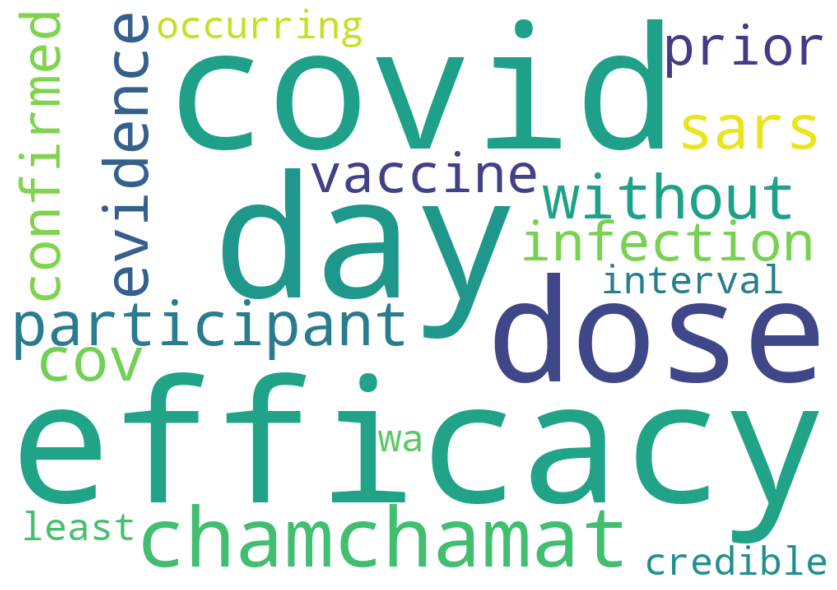

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
for i in range(len(data)):
    df_list +=data['Tweet'][i]

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10).generate(data['ProcessedText'][1])
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()